### Import Libraries

In [73]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Prepare the image

In [69]:
image = cv2.imread('color img.jpg')
#image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image.reshape((-1, 3))
pixels = np.float32(pixels)

In [114]:
num_colors = 5

### K-means clustering

In [115]:
clf = KMeans(n_clusters = num_colors)
labels = clf.fit_predict(image.reshape(image.shape[0]*image.shape[1], 3))

In [116]:
counts = Counter(labels)
print('counts',counts)

counts Counter({4: 19727, 0: 10998, 1: 9722, 3: 7958, 2: 2125})


### Identify colors

In [120]:
center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [ "#{:02x}{:02x}{:02x}".format(int(ordered_colors[i][0]), int(ordered_colors[i][1]), int(ordered_colors[i][2])) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]
print(hex_colors)
print(rgb_colors)

['#c9dee8', '#a0d937', '#142d14', '#6ba81c', '#2c6ba7']
[array([201.89333874, 222.07269593, 232.26188786]), array([160.40380069, 217.66584834,  55.35533733]), array([20.32173095, 45.76105362, 20.19143932]), array([107.1606133 , 168.50735202,  28.51991957]), array([ 44.73619253, 107.93654222, 167.31811169])]


In [123]:
color_names = ['light blue', 'light green', 'dark green', 'olivedrab', 'blue']

### plot a pie chart

([<matplotlib.patches.Wedge at 0x1a7c8018c70>,
 [Text(0.9050999066672583, 0.6251353125131556, 'light blue'),
  Text(-0.8369017005749286, 0.7138596105501366, 'light green'),
  Text(-0.8741056524229647, -0.6677868734875098, 'dark green'),
  Text(-0.31615798947018914, -1.0535863162048793, 'olivedrab'),
  Text(0.8527116990216972, -0.6948976603439753, 'blue')])

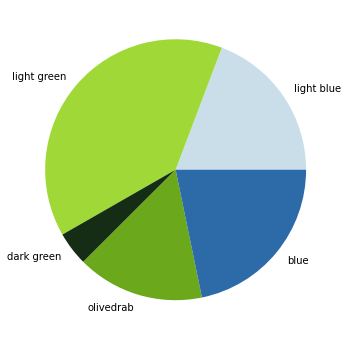

In [124]:
plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = color_names, colors = hex_colors)
